#No2

Link: https://binusianorg-my.sharepoint.com/personal/johnny_binus_ac_id/_layouts/15/guestaccess.aspx?docid=02a74072c610d426c9ba134ab122aea6b&authkey=AQ-aVm_UIIQJuY5A9YWTjRY&e=Tks9Dw

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, Activation, Reshape, Dropout
from tensorflow.keras.models import Model
from keras.layers import Flatten
from keras import backend as K
from sklearn.preprocessing import MinMaxScaler
import sqlite3
import pandas as pd
import math
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from datetime import datetime
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import GRU
from keras.regularizers import l2
from keras.optimizers import SGD

<ipython-input-30-394e56ad8a90>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [31]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##APPL

###EDA

In [32]:
df1 = pd.read_csv('/content/drive/MyDrive/UAS Deep Learning/AAPL.csv')
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [33]:
df1 = df1[['Date', 'Close']]
df1.head()

,Date,Close
0,1980-12-12,0.513393
1,1980-12-15,0.486607
2,1980-12-16,0.450893
3,1980-12-17,0.462054
4,1980-12-18,0.475446


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9909 non-null   object 
 1   Close   9909 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.0+ KB


In [35]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,9909.0,32.61803,58.471899,0.196429,1.071429,1.732143,35.761429,327.200012


In [36]:
print(df1.isna().sum())
df1.shape

Date     0
Close    0
dtype: int64


(9909, 2)

###Preprocessing

[  0.51339287   0.48660713   0.45089287 ... 254.80999756 254.28999329
 240.91000366]


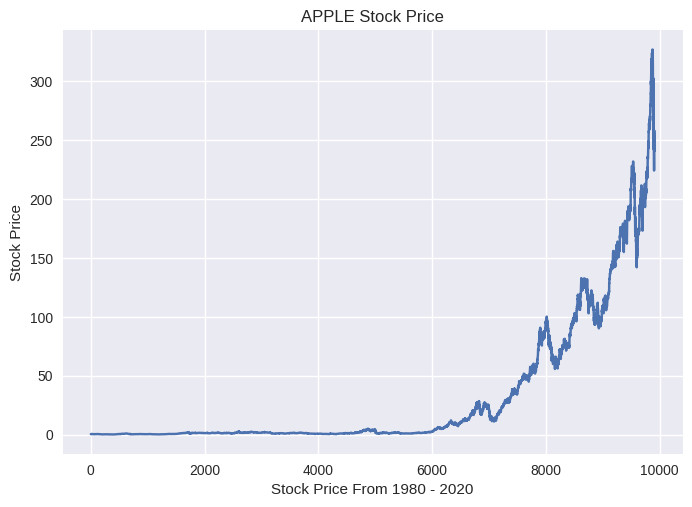

In [37]:
df1_plot = df1.iloc[:,1].values
print(df1_plot)
plt.plot(df1_plot)
plt.xlabel("Stock Price From 1980 - 2020")
plt.ylabel("Stock Price")
plt.title("APPLE Stock Price")
plt.show()

In [38]:
df1_close = df1['Close'].values
df1_close

array([  0.51339287,   0.48660713,   0.45089287, ..., 254.80999756,
       254.28999329, 240.91000366])

In [39]:
df1_data = df1_close.reshape(-1,1)
df1_data.shape

(9909, 1)

In [40]:
scaler = MinMaxScaler(feature_range = (0,1))
df1_data = scaler.fit_transform(df1_data)

In [41]:
# Define window size and horizon
WINDOW_SIZE = 5
HORIZON = 1
# Create empty lists for input and output data
X = []
y = []

for i in range(len(df1_data) - WINDOW_SIZE - HORIZON + 1):
    df1_input_window = df1_data[i:i + WINDOW_SIZE]
    df1_output_window = df1_data[i + WINDOW_SIZE + HORIZON - 1]
    X.append(df1_input_window)
    y.append(df1_output_window)

X = np.array(X)
y = np.array(y)

print("Input data:")
print(X)
print("Output data:")
print(y)

Input data:
[[[9.69299159e-04]
  [8.87386505e-04]
  [7.78169755e-04]
  [8.12299966e-04]
  [8.53256293e-04]]

 [[8.87386505e-04]
  [7.78169755e-04]
  [8.12299966e-04]
  [8.53256293e-04]
  [9.41994880e-04]]

 [[7.78169755e-04]
  [8.12299966e-04]
  [8.53256293e-04]
  [9.41994880e-04]
  [1.01708151e-03]]

 ...

 [[6.85538562e-01]
  [7.54375758e-01]
  [7.50216780e-01]
  [7.89727045e-01]
  [7.57005701e-01]]

 [[7.54375758e-01]
  [7.50216780e-01]
  [7.89727045e-01]
  [7.57005701e-01]
  [7.78626234e-01]]

 [[7.50216780e-01]
  [7.89727045e-01]
  [7.57005701e-01]
  [7.78626234e-01]
  [7.77036025e-01]]]
Output data:
[[0.00094199]
 [0.00101708]
 [0.00108534]
 ...
 [0.77862623]
 [0.77703602]
 [0.73611907]]


In [42]:
df1_train_size = int(len(X) * 0.8)
df1_val_size = int(len(X) * 0.1)
df1_test_size = len(X) - df1_train_size - df1_val_size

df1_train_input = X[:df1_train_size]
df1_train_output = y[:df1_train_size]
df1_val_input = X[df1_train_size : df1_train_size + df1_val_size]
df1_val_output = y[df1_train_size : df1_train_size+ df1_val_size]
df1_test_input = X[df1_train_size + df1_val_size:]
df1_test_output = y[df1_train_size + df1_val_size:]

print("Train size: {}, Val size: {}, Test size: {}".format(len(df1_train_input), len(df1_val_input), len(df1_test_input)))

Train size: 7923, Val size: 990, Test size: 991


###Baseline Architecture

Epoch 1/50
248/248 [==============================] - 2s 2ms/step - loss: 4.5140e-05 - mae: 0.0022
Epoch 2/50
248/248 [==============================] - 1s 2ms/step - loss: 2.3068e-06 - mae: 7.4053e-04
Epoch 3/50
248/248 [==============================] - 1s 2ms/step - loss: 2.4547e-06 - mae: 8.2688e-04
Epoch 4/50
248/248 [==============================] - 1s 2ms/step - loss: 2.3324e-06 - mae: 8.3177e-04
Epoch 5/50
248/248 [==============================] - 1s 2ms/step - loss: 2.8828e-06 - mae: 0.0010
Epoch 6/50
248/248 [==============================] - 1s 2ms/step - loss: 2.4796e-06 - mae: 9.4297e-04
Epoch 7/50
248/248 [==============================] - 1s 2ms/step - loss: 2.2575e-06 - mae: 8.0815e-04
Epoch 8/50
248/248 [==============================] - 1s 2ms/step - loss: 2.3627e-06 - mae: 9.1901e-04
Epoch 9/50
248/248 [==============================] - 1s 2ms/step - loss: 2.6894e-06 - mae: 0.0010
Epoch 10/50
248/248 [==============================] - 1s 3ms/step - loss: 2.4866e-06

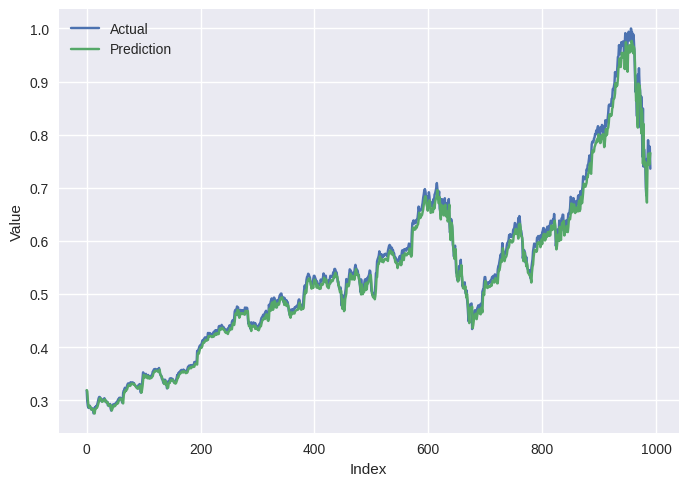

In [44]:
def baseline_transformer(window_size, horizon):
  input_layer = Input(shape=(window_size, 1))
  x = Conv1D(filters=128, kernel_size=3, activation='relu')(input_layer)
  x = Flatten()(x)
  x = Dense(1)(x)
  output_layer = Reshape((horizon, 1))(x)
  model = Model(input_layer, output_layer)
  return model

model = baseline_transformer(window_size=WINDOW_SIZE, horizon=HORIZON)
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Train the model
history = model.fit(df1_train_input, df1_train_output, epochs=50)

predict = model.predict(df1_test_input)
predict = predict.reshape((predict.shape[0], predict.shape[1]))

rmse = np.sqrt(mean_squared_error(df1_test_output, predict))
mae = mean_absolute_error(df1_test_output, predict)
mape = np.mean(np.abs((df1_test_output - predict) / df1_test_output)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

plt.plot(df1_test_output, label="Actual")
plt.plot(predict, label="Prediction")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###Model 1

Epoch 1/50
248/248 [==============================] - 2s 2ms/step - loss: 4.7654e-05 - mae: 0.0025
Epoch 2/50
248/248 [==============================] - 0s 2ms/step - loss: 2.4994e-06 - mae: 8.6974e-04
Epoch 3/50
248/248 [==============================] - 0s 2ms/step - loss: 2.5955e-06 - mae: 9.0476e-04
Epoch 4/50
248/248 [==============================] - 0s 2ms/step - loss: 3.2353e-06 - mae: 0.0011
Epoch 5/50
248/248 [==============================] - 0s 2ms/step - loss: 3.2073e-06 - mae: 0.0011
Epoch 6/50
248/248 [==============================] - 0s 2ms/step - loss: 3.2016e-06 - mae: 0.0011
Epoch 7/50
248/248 [==============================] - 1s 2ms/step - loss: 2.2843e-06 - mae: 9.0312e-04
Epoch 8/50
248/248 [==============================] - 1s 2ms/step - loss: 2.5824e-06 - mae: 0.0010
Epoch 9/50
248/248 [==============================] - 0s 2ms/step - loss: 2.9294e-06 - mae: 0.0011
Epoch 10/50
248/248 [==============================] - 0s 2ms/step - loss: 2.0745e-06 - mae: 8.66

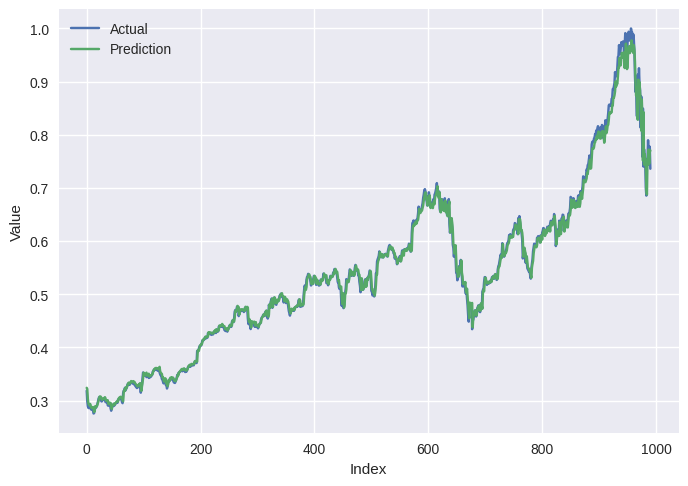

In [61]:
#masih menggunakan Conv1D, filters=256, activation='tanh'

def modified_transformer(window_size, horizon):
  input_layer = Input(shape=(window_size, 1))
  x = Conv1D(filters=256, kernel_size=3, activation='tanh')(input_layer)
  x = Flatten()(x)
  x = Dense(1)(x)
  output_layer = Reshape((horizon, 1))(x)
  model = Model(input_layer, output_layer)
  return model

model = modified_transformer(window_size=WINDOW_SIZE, horizon=HORIZON)
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Train the model
history = model.fit(df1_train_input, df1_train_output, epochs=50)

predict = model.predict(df1_test_input)
predict = predict.reshape((predict.shape[0], predict.shape[1]))

rmse = np.sqrt(mean_squared_error(df1_test_output, predict))
mae = mean_absolute_error(df1_test_output, predict)
mape = np.mean(np.abs((df1_test_output - predict) / df1_test_output)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

plt.plot(df1_test_output, label="Actual")
plt.plot(predict, label="Prediction")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###Model 2

Epoch 1/50
248/248 [==============================] - 8s 24ms/step - loss: 6.1288e-05 - mae: 0.0027
Epoch 2/50
248/248 [==============================] - 4s 17ms/step - loss: 2.9103e-06 - mae: 0.0011
Epoch 3/50
248/248 [==============================] - 4s 17ms/step - loss: 2.6710e-06 - mae: 9.8656e-04
Epoch 4/50
248/248 [==============================] - 6s 24ms/step - loss: 3.1397e-06 - mae: 0.0011
Epoch 5/50
248/248 [==============================] - 4s 17ms/step - loss: 3.1193e-06 - mae: 0.0011
Epoch 6/50
248/248 [==============================] - 4s 17ms/step - loss: 2.3370e-06 - mae: 9.3239e-04
Epoch 7/50
248/248 [==============================] - 6s 23ms/step - loss: 2.7983e-06 - mae: 0.0011
Epoch 8/50
248/248 [==============================] - 6s 23ms/step - loss: 2.6157e-06 - mae: 0.0011
Epoch 9/50
248/248 [==============================] - 4s 16ms/step - loss: 2.2367e-06 - mae: 9.2422e-04
Epoch 10/50
248/248 [==============================] - 6s 24ms/step - loss: 2.8235e-06 -

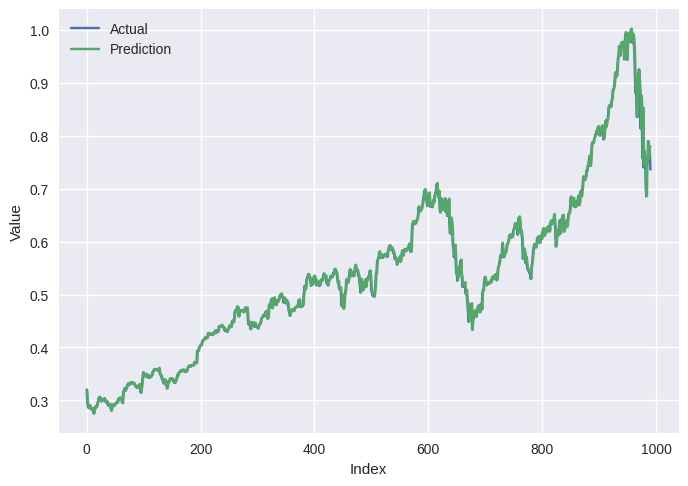

In [63]:
#menggunakan GRU, units=256, activation='tanh'
def baseline_transformer(window_size, horizon):
  input_layer = Input(shape=(window_size, 1))
  x = GRU(units=256, activation='tanh')(input_layer)
  x = Flatten()(x)
  x = Dense(1)(x)
  output_layer = Reshape((horizon, 1))(x)
  model = Model(input_layer, output_layer)
  return model

model = baseline_transformer(window_size=WINDOW_SIZE, horizon=HORIZON)
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Train the model
history = model.fit(df1_train_input, df1_train_output, epochs=50)

predict = model.predict(df1_test_input)
predict = predict.reshape((predict.shape[0], predict.shape[1]))

rmse = np.sqrt(mean_squared_error(df1_test_output, predict))
mae = mean_absolute_error(df1_test_output, predict)
mape = np.mean(np.abs((df1_test_output - predict) / df1_test_output)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

plt.plot(df1_test_output, label="Actual")
plt.plot(predict, label="Prediction")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()


###Model 3

Epoch 1/50
248/248 [==============================] - 9s 24ms/step - loss: 0.0015 - mae: 0.0242
Epoch 2/50
248/248 [==============================] - 4s 17ms/step - loss: 8.0388e-04 - mae: 0.0181
Epoch 3/50
248/248 [==============================] - 4s 16ms/step - loss: 4.3697e-04 - mae: 0.0133
Epoch 4/50
248/248 [==============================] - 8s 32ms/step - loss: 2.3010e-04 - mae: 0.0096
Epoch 5/50
248/248 [==============================] - 4s 18ms/step - loss: 1.1816e-04 - mae: 0.0069
Epoch 6/50
248/248 [==============================] - 4s 16ms/step - loss: 5.9742e-05 - mae: 0.0049
Epoch 7/50
248/248 [==============================] - 6s 24ms/step - loss: 2.9663e-05 - mae: 0.0034
Epoch 8/50
248/248 [==============================] - 4s 16ms/step - loss: 1.4899e-05 - mae: 0.0024
Epoch 9/50
248/248 [==============================] - 4s 16ms/step - loss: 7.7321e-06 - mae: 0.0017
Epoch 10/50
248/248 [==============================] - 6s 23ms/step - loss: 4.3033e-06 - mae: 0.0012
Epo

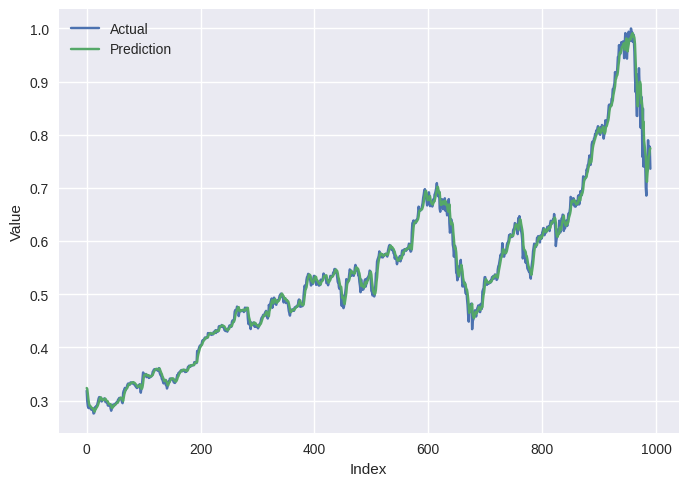

In [65]:
#optimizer SGD(lr=0.01, momentum=0.9)
def baseline_transformer(window_size, horizon):
  input_layer = Input(shape=(window_size, 1))
  x = GRU(units=256, activation='tanh')(input_layer)
  x = Flatten()(x)
  x = Dense(1)(x)
  output_layer = Reshape((horizon, 1))(x)
  model = Model(input_layer, output_layer)
  opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
  model.compile(loss='mse', optimizer=opt, metrics=['mae'])
  return model

model = baseline_transformer(window_size=WINDOW_SIZE, horizon=HORIZON)

# Train the model
history = model.fit(df1_train_input, df1_train_output, epochs=50)

predict = model.predict(df1_test_input)
predict = predict.reshape((predict.shape[0], predict.shape[1]))

rmse = np.sqrt(mean_squared_error(df1_test_output, predict))
mae = mean_absolute_error(df1_test_output, predict)
mape = np.mean(np.abs((df1_test_output - predict) / df1_test_output)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

plt.plot(df1_test_output, label="Actual")
plt.plot(predict, label="Prediction")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()


##AMD

###EDA

In [66]:
df2 = pd.read_csv('/content/drive/MyDrive/UAS Deep Learning/AMD.csv')
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
2,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
3,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
4,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [67]:
df2 = df2[['Date', 'Close']]
df2.head()

,Date,Close
0,1980-03-17,3.145833
1,1980-03-18,3.031250
2,1980-03-19,3.041667
3,1980-03-20,3.010417
4,1980-03-21,2.916667


In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10098 entries, 0 to 10097
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10098 non-null  object 
 1   Close   10098 non-null  float64
dtypes: float64(1), object(1)
memory usage: 157.9+ KB


In [69]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,10098.0,11.210802,8.283645,1.62,4.9375,9.0625,14.7075,58.900002


In [70]:
print(df2.isna().sum())
df2.shape

Date     0
Close    0
dtype: int64


(10098, 2)

###Preprocessing

[ 3.14583325  3.03125     3.04166675 ... 47.86000061 45.47999954
 43.65999985]


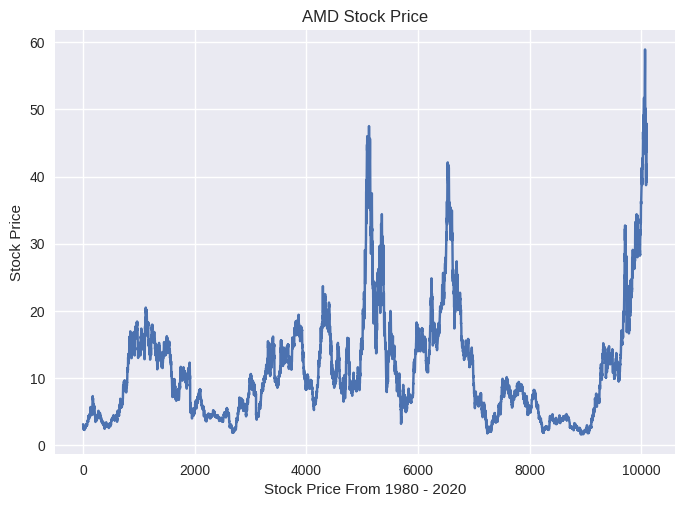

In [71]:
df2_plot = df2.iloc[:,1].values
print(df2_plot)
plt.plot(df2_plot)
plt.xlabel("Stock Price From 1980 - 2020")
plt.ylabel("Stock Price")
plt.title("AMD Stock Price")
plt.show()

In [72]:
df2_close = df2['Close'].values
df2_close

array([ 3.14583325,  3.03125   ,  3.04166675, ..., 47.86000061,
       45.47999954, 43.65999985])

In [73]:
df2_data = df2_close.reshape(-1,1)
df2_data.shape

(10098, 1)

In [74]:
scaler = MinMaxScaler(feature_range = (0,1))
df2_data = scaler.fit_transform(df2_data)

In [75]:
# Define window size and horizon
WINDOW_SIZE = 5
HORIZON = 1
# Create empty lists for input and output data
X = []
y = []

for i in range(len(df2_data) - WINDOW_SIZE - HORIZON + 1):
    df2_input_window = df2_data[i:i + WINDOW_SIZE]
    df2_output_window = df2_data[i + WINDOW_SIZE + HORIZON - 1]
    X.append(df2_input_window)
    y.append(df2_output_window)

X = np.array(X)
y = np.array(y)

print("Input data:")
print(X)
print("Output data:")
print(y)

Input data:
[[[0.02663815]
  [0.02463774]
  [0.0248196 ]
  [0.02427403]
  [0.02263734]]

 [[0.02463774]
  [0.0248196 ]
  [0.02427403]
  [0.02263734]
  [0.01827281]]

 [[0.0248196 ]
  [0.02427403]
  [0.02263734]
  [0.01827281]
  [0.01718168]]

 ...

 [[0.69867316]
  [0.77863129]
  [0.7508729 ]
  [0.80097763]
  [0.78491621]]

 [[0.77863129]
  [0.7508729 ]
  [0.80097763]
  [0.78491621]
  [0.80726256]]

 [[0.7508729 ]
  [0.80097763]
  [0.78491621]
  [0.80726256]
  [0.76571226]]]
Output data:
[[0.01827281]
 [0.01718168]
 [0.01445385]
 ...
 [0.80726256]
 [0.76571226]
 [0.73393853]]


In [76]:
df2_train_size = int(len(X) * 0.8)
df2_val_size = int(len(X) * 0.1)
df2_test_size = len(X) - df2_train_size - df2_val_size

df2_train_input = X[:df2_train_size]
df2_train_output = y[:df2_train_size]
df2_val_input = X[df2_train_size : df2_train_size + df2_val_size]
df2_val_output = y[df2_train_size : df2_train_size+ df2_val_size]
df2_test_input = X[df2_train_size + df2_val_size:]
df2_test_output = y[df2_train_size + df2_val_size:]

print("Train size: {}, Val size: {}, Test size: {}".format(len(df2_train_input), len(df2_val_input), len(df2_test_input)))

Train size: 8074, Val size: 1009, Test size: 1010


###Baseline Architecture

Epoch 1/50
253/253 [==============================] - 3s 2ms/step - loss: 0.0011 - mae: 0.0148
Epoch 2/50
253/253 [==============================] - 1s 2ms/step - loss: 1.7909e-04 - mae: 0.0084
Epoch 3/50
253/253 [==============================] - 1s 2ms/step - loss: 1.6076e-04 - mae: 0.0079
Epoch 4/50
253/253 [==============================] - 1s 4ms/step - loss: 1.4322e-04 - mae: 0.0076
Epoch 5/50
253/253 [==============================] - 1s 3ms/step - loss: 1.2680e-04 - mae: 0.0070
Epoch 6/50
253/253 [==============================] - 1s 3ms/step - loss: 1.2091e-04 - mae: 0.0070
Epoch 7/50
253/253 [==============================] - 1s 3ms/step - loss: 1.1167e-04 - mae: 0.0066
Epoch 8/50
253/253 [==============================] - 1s 5ms/step - loss: 1.1157e-04 - mae: 0.0067
Epoch 9/50
253/253 [==============================] - 1s 5ms/step - loss: 1.0227e-04 - mae: 0.0063
Epoch 10/50
253/253 [==============================] - 1s 5ms/step - loss: 1.0505e-04 - mae: 0.0064
Epoch 11/50
2

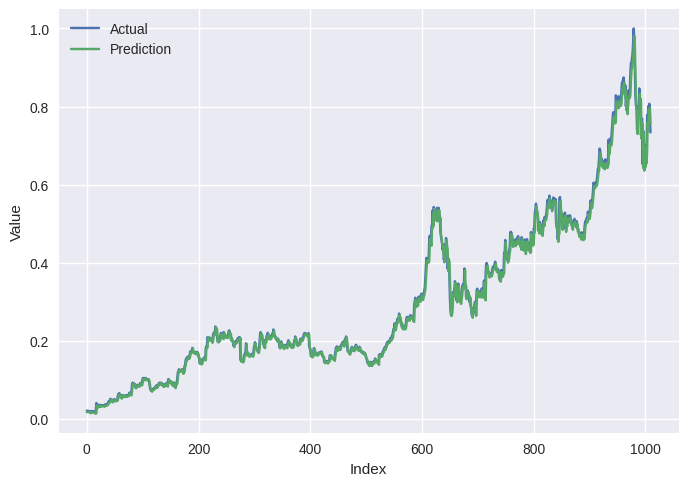

In [77]:
def baseline_transformer(window_size, horizon):
  input_layer = Input(shape=(window_size, 1))
  x = Conv1D(filters=128, kernel_size=3, activation='relu')(input_layer)
  x = Flatten()(x)
  x = Dense(1)(x)
  output_layer = Reshape((horizon, 1))(x)
  model = Model(input_layer, output_layer)
  return model

model = baseline_transformer(window_size=WINDOW_SIZE, horizon=HORIZON)
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Train the model
history = model.fit(df2_train_input, df2_train_output, epochs=50)

predict = model.predict(df2_test_input)
predict = predict.reshape((predict.shape[0], predict.shape[1]))

rmse = np.sqrt(mean_squared_error(df2_test_output, predict))
mae = mean_absolute_error(df2_test_output, predict)
mape = np.mean(np.abs((df2_test_output - predict) / df2_test_output)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

plt.plot(df2_test_output, label="Actual")
plt.plot(predict, label="Prediction")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###Model 1

Epoch 1/50
253/253 [==============================] - 2s 3ms/step - loss: 0.0012 - mae: 0.0160
Epoch 2/50
253/253 [==============================] - 1s 2ms/step - loss: 1.7258e-04 - mae: 0.0082
Epoch 3/50
253/253 [==============================] - 1s 2ms/step - loss: 1.4044e-04 - mae: 0.0074
Epoch 4/50
253/253 [==============================] - 1s 2ms/step - loss: 1.1716e-04 - mae: 0.0067
Epoch 5/50
253/253 [==============================] - 1s 2ms/step - loss: 1.1036e-04 - mae: 0.0066
Epoch 6/50
253/253 [==============================] - 1s 2ms/step - loss: 1.1038e-04 - mae: 0.0067
Epoch 7/50
253/253 [==============================] - 1s 2ms/step - loss: 1.0877e-04 - mae: 0.0066
Epoch 8/50
253/253 [==============================] - 1s 3ms/step - loss: 1.0727e-04 - mae: 0.0066
Epoch 9/50
253/253 [==============================] - 1s 3ms/step - loss: 9.5310e-05 - mae: 0.0060
Epoch 10/50
253/253 [==============================] - 1s 3ms/step - loss: 1.0224e-04 - mae: 0.0064
Epoch 11/50
2

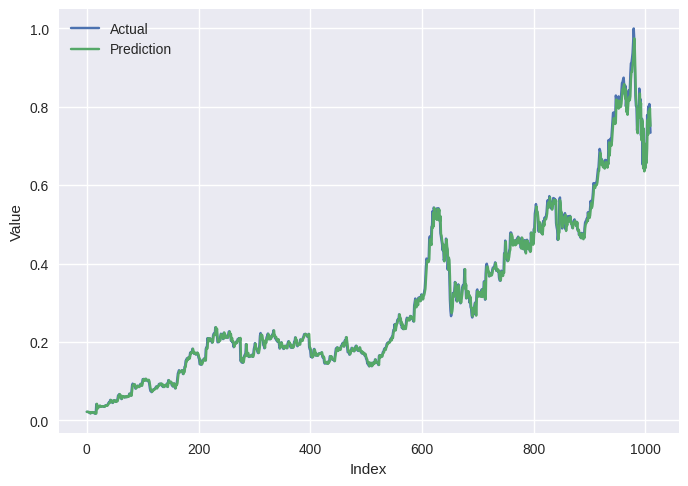

In [79]:
#masih menggunakan Conv1D, filters=256, activation='tanh'

def modified_transformer(window_size, horizon):
  input_layer = Input(shape=(window_size, 1))
  x = Conv1D(filters=256, kernel_size=3, activation='tanh')(input_layer)
  x = Flatten()(x)
  x = Dense(1)(x)
  output_layer = Reshape((horizon, 1))(x)
  model = Model(input_layer, output_layer)
  return model

model = modified_transformer(window_size=WINDOW_SIZE, horizon=HORIZON)
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Train the model
history = model.fit(df2_train_input, df2_train_output, epochs=50)

predict = model.predict(df2_test_input)
predict = predict.reshape((predict.shape[0], predict.shape[1]))

rmse = np.sqrt(mean_squared_error(df2_test_output, predict))
mae = mean_absolute_error(df2_test_output, predict)
mape = np.mean(np.abs((df2_test_output - predict) / df2_test_output)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

plt.plot(df2_test_output, label="Actual")
plt.plot(predict, label="Prediction")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###Model 2

Epoch 1/50
253/253 [==============================] - 15s 31ms/step - loss: 6.5380e-04 - mae: 0.0128
Epoch 2/50
253/253 [==============================] - 7s 28ms/step - loss: 1.5281e-04 - mae: 0.0076
Epoch 3/50
253/253 [==============================] - 4s 17ms/step - loss: 1.4060e-04 - mae: 0.0074
Epoch 4/50
253/253 [==============================] - 5s 20ms/step - loss: 1.2743e-04 - mae: 0.0073
Epoch 5/50
253/253 [==============================] - 5s 21ms/step - loss: 1.1574e-04 - mae: 0.0068
Epoch 6/50
253/253 [==============================] - 4s 17ms/step - loss: 1.1145e-04 - mae: 0.0067
Epoch 7/50
253/253 [==============================] - 5s 20ms/step - loss: 1.1697e-04 - mae: 0.0072
Epoch 8/50
253/253 [==============================] - 5s 21ms/step - loss: 9.9835e-05 - mae: 0.0063
Epoch 9/50
253/253 [==============================] - 4s 17ms/step - loss: 9.3989e-05 - mae: 0.0060
Epoch 10/50
253/253 [==============================] - 5s 19ms/step - loss: 1.0262e-04 - mae: 0.006

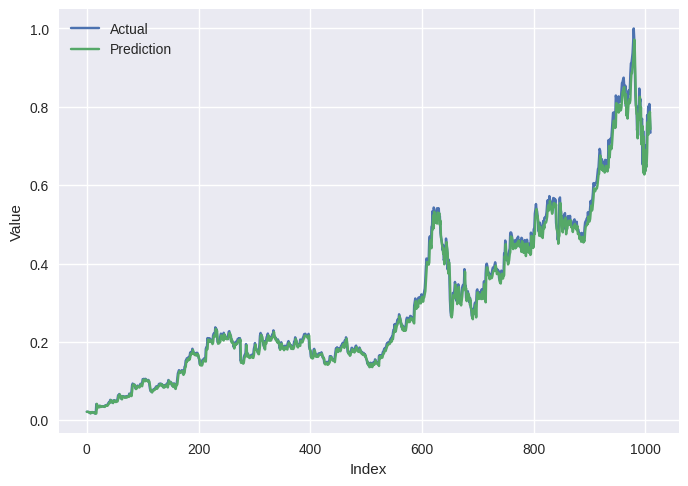

In [80]:
#menggunakan GRU, units=256, activation='tanh'
def baseline_transformer(window_size, horizon):
  input_layer = Input(shape=(window_size, 1))
  x = GRU(units=256, activation='tanh')(input_layer)
  x = Flatten()(x)
  x = Dense(1)(x)
  output_layer = Reshape((horizon, 1))(x)
  model = Model(input_layer, output_layer)
  return model

model = baseline_transformer(window_size=WINDOW_SIZE, horizon=HORIZON)
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Train the model
history = model.fit(df2_train_input, df2_train_output, epochs=50)

predict = model.predict(df2_test_input)
predict = predict.reshape((predict.shape[0], predict.shape[1]))

rmse = np.sqrt(mean_squared_error(df2_test_output, predict))
mae = mean_absolute_error(df2_test_output, predict)
mape = np.mean(np.abs((df2_test_output - predict) / df2_test_output)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

plt.plot(df2_test_output, label="Actual")
plt.plot(predict, label="Prediction")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###Model 3

Epoch 1/50
253/253 [==============================] - 6s 17ms/step - loss: 0.0052 - mae: 0.0451
Epoch 2/50
253/253 [==============================] - 6s 25ms/step - loss: 1.4193e-04 - mae: 0.0075
Epoch 3/50
253/253 [==============================] - 4s 17ms/step - loss: 1.1937e-04 - mae: 0.0066
Epoch 4/50
253/253 [==============================] - 4s 17ms/step - loss: 1.1886e-04 - mae: 0.0066
Epoch 5/50
253/253 [==============================] - 6s 25ms/step - loss: 1.1891e-04 - mae: 0.0065
Epoch 6/50
253/253 [==============================] - 4s 17ms/step - loss: 1.1945e-04 - mae: 0.0066
Epoch 7/50
253/253 [==============================] - 4s 17ms/step - loss: 1.1922e-04 - mae: 0.0066
Epoch 8/50
253/253 [==============================] - 6s 25ms/step - loss: 1.1908e-04 - mae: 0.0066
Epoch 9/50
253/253 [==============================] - 4s 17ms/step - loss: 1.1889e-04 - mae: 0.0066
Epoch 10/50
253/253 [==============================] - 4s 18ms/step - loss: 1.1891e-04 - mae: 0.0066
Epo

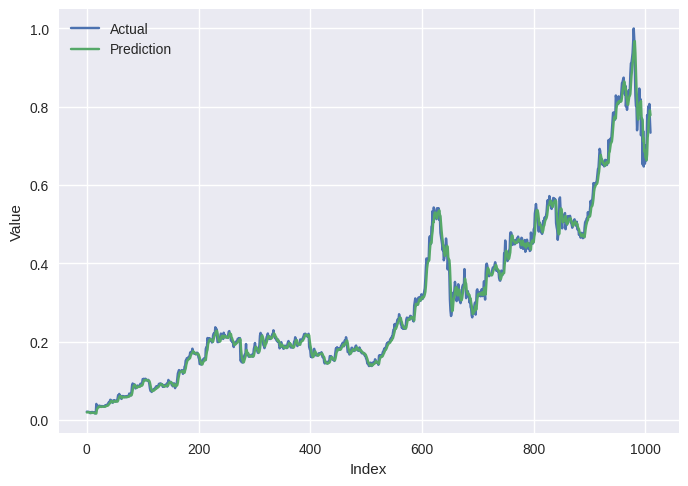

In [86]:
#optimizer SGD(lr=0.001, momentum=0.9)
def baseline_transformer(window_size, horizon):
  input_layer = Input(shape=(window_size, 1))
  x = GRU(units=256, activation='tanh')(input_layer)
  x = Flatten()(x)
  x = Dense(1)(x)
  output_layer = Reshape((horizon, 1))(x)
  model = Model(input_layer, output_layer)
  opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
  model.compile(loss='mse', optimizer=opt, metrics=['mae'])
  return model

model = baseline_transformer(window_size=WINDOW_SIZE, horizon=HORIZON)

# Train the model
history = model.fit(df2_train_input, df2_train_output, epochs=50)

predict = model.predict(df2_test_input)
predict = predict.reshape((predict.shape[0], predict.shape[1]))

rmse = np.sqrt(mean_squared_error(df2_test_output, predict))
mae = mean_absolute_error(df2_test_output, predict)
mape = np.mean(np.abs((df2_test_output - predict) / df2_test_output)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

plt.plot(df2_test_output, label="Actual")
plt.plot(predict, label="Prediction")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()


Kesimpulannya saya yang terbaik adalah untuk arsitektur transformers yang terbaik menggunakan GRU.
Kemudian untuk units/filters paling baik menggunakan 256 karena lebih kompleks, dimana saat menggunakan kisaran 128 atau dibawahnya prediksinya meleset lebih besar dari data aktualnya.
Kemudian rata-rata penggunaan activations tanh lebih baik daripada menggunakan relu. Karena menggunakan tanh jauh lebih kompleks perhitungannya sehingga menyebabkan prediksinya lebih baik. Kemudian untuk optimizer yang terbaik menggunakan adam, tidak ada yang lebih baik hasilnya jika optimizernya bukan adam.